In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and clean the data

In [2]:
df = pd.read_csv('disasters.csv')

In [3]:
df.shape

(14643, 17)

In [4]:
df.head()

,Disaster Type,Country,ISO,Region,Continent,Location,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,Total Deaths,Total Affected,Total Damages ('000 US$),CPI
0,Flood,Argentina,ARG,South America,Americas,Mendoza,NaN,Km2,NaN,NaN,1970,1.0,4.0,36.0,NaN,25000.0,15.001282
1,Storm,Australia,AUS,Australia and New Zealand,Oceania,Queensland,NaN,Kph,NaN,NaN,1970,1.0,NaN,13.0,NaN,72475.0,15.001282
2,Flood,Benin,BEN,Western Africa,Africa,Atacora region,NaN,Km2,NaN,NaN,1970,9.0,NaN,NaN,NaN,200.0,15.001282
3,Storm,Bangladesh,BGD,Southern Asia,Asia,"Khulna, Chittagong",NaN,Kph,NaN,NaN,1970,11.0,12.0,300000.0,3648000.0,86400.0,15.001282
4,Storm,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,Kph,NaN,NaN,1970,4.0,13.0,17.0,110.0,NaN,15.001282


Round all values into two decimals;  
Change the format of 'Start Month' and 'Start Day' into int

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14643 entries, 0 to 14642
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disaster Type             14643 non-null  object 
 1   Country                   14643 non-null  object 
 2   ISO                       14643 non-null  object 
 3   Region                    14643 non-null  object 
 4   Continent                 14643 non-null  object 
 5   Location                  13298 non-null  object 
 6   Dis Mag Value             4569 non-null   float64
 7   Dis Mag Scale             13570 non-null  object 
 8   Latitude                  2331 non-null   object 
 9   Longitude                 2335 non-null   object 
 10  Start Year                14643 non-null  int64  
 11  Start Month               14375 non-null  float64
 12  Start Day                 11576 non-null  float64
 13  Total Deaths              10198 non-null  float64
 14  Total 

Drop all the example with no 'Start Month';  
Replace null value in 'Start Day' with 15;  
Set all numerical value into two decimal places;  
Change all value of 'Start Month', 'Start Day' into int.

In [6]:
df1 = df.dropna(axis = 0, subset = ['Start Month'])

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df1['Start Month'] = pd.to_numeric(df1['Start Month'], errors='coerce').astype('int64')
df1['Start Day'] = pd.to_numeric(df1['Start Day'], errors='coerce').fillna('15').astype('int64')

C:\Users\Zheyi\AppData\Local\Temp\ipykernel_21720\3379385591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Start Month'] = pd.to_numeric(df1['Start Month'], errors='coerce').astype('int64')
C:\Users\Zheyi\AppData\Local\Temp\ipykernel_21720\3379385591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Start Day'] = pd.to_numeric(df1['Start Day'], errors='coerce').fillna('15').astype('int64')


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14375 entries, 0 to 14642
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disaster Type             14375 non-null  object 
 1   Country                   14375 non-null  object 
 2   ISO                       14375 non-null  object 
 3   Region                    14375 non-null  object 
 4   Continent                 14375 non-null  object 
 5   Location                  13143 non-null  object 
 6   Dis Mag Value             4557 non-null   float64
 7   Dis Mag Scale             13340 non-null  object 
 8   Latitude                  2331 non-null   object 
 9   Longitude                 2335 non-null   object 
 10  Start Year                14375 non-null  int64  
 11  Start Month               14375 non-null  int64  
 12  Start Day                 14375 non-null  int64  
 13  Total Deaths              10120 non-null  float64
 14  Total 

In [8]:
df1.describe(include = 'all')

,Disaster Type,Country,ISO,Region,Continent,Location,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,Total Deaths,Total Affected,Total Damages ('000 US$),CPI
count,14375,14375,14375,14375,14375,13143,4557.00,13340,2331,2335,14375.00,14375.00,14375.00,10120.00,10881.00,4831.00,14062.00
unique,14,228,228,23,5,11884,NaN,5,2091,2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Flood,United States of America (the),USA,Southern Asia,Asia,North,NaN,Km2,3.295,95.982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5240,940,940,1828,5725,33,NaN,6242,12,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,51011.02,NaN,NaN,NaN,2001.82,6.41,15.17,353.80,706855.46,776137.07,69.13
std,NaN,NaN,NaN,NaN,NaN,NaN,321513.39,NaN,NaN,NaN,12.45,3.39,8.05,6444.57,7671469.26,4916485.67,21.26
min,NaN,NaN,NaN,NaN,NaN,NaN,-57.00,NaN,NaN,NaN,1970.00,1.00,1.00,1.00,1.00,2.00,15.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.00,NaN,NaN,NaN,1994.00,4.00,9.00,5.00,615.00,10000.00,55.82
50%,NaN,NaN,NaN,NaN,NaN,NaN,180.00,NaN,NaN,NaN,2003.00,7.00,15.00,16.00,5500.00,71103.00,71.08
75%,NaN,NaN,NaN,NaN,NaN,NaN,15150.00,NaN,NaN,NaN,2012.00,9.00,21.00,50.00,52990.00,350000.00,86.91


Clean the date data:  
There is one row containing the date of 1992/9/31, which obviously does not exist.  
We take that as a typo and replace it with 1992/9/30

In [9]:
a = df1.loc[(df1['Start Day'] == 31) & (df1['Start Month'] == 9)].index.tolist()
a = a[0]
df1.loc[a, ['Start Day']] = 30

C:\Users\Zheyi\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Combine year, month, date into a datetime instead of a int  
Drop 'Start Year', 'Start Month', 'Start Day'

In [10]:
df2 = df1.copy()
df2['Date'] = df2['Start Year'].map(str)+ "/"+ df2['Start Month'].map(str)+ "/" + df2['Start Day'].map(str)

pd.to_datetime(df2['Date'])

df2 = df2.drop(['Start Year', 'Start Month', 'Start Day'], axis = 1)

df2.head()

,Disaster Type,Country,ISO,Region,Continent,Location,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Total Deaths,Total Affected,Total Damages ('000 US$),CPI,Date
0,Flood,Argentina,ARG,South America,Americas,Mendoza,NaN,Km2,NaN,NaN,36.00,NaN,25000.00,15.00,1970/1/4
1,Storm,Australia,AUS,Australia and New Zealand,Oceania,Queensland,NaN,Kph,NaN,NaN,13.00,NaN,72475.00,15.00,1970/1/15
2,Flood,Benin,BEN,Western Africa,Africa,Atacora region,NaN,Km2,NaN,NaN,NaN,NaN,200.00,15.00,1970/9/15
3,Storm,Bangladesh,BGD,Southern Asia,Asia,"Khulna, Chittagong",NaN,Kph,NaN,NaN,300000.00,3648000.00,86400.00,15.00,1970/11/12
4,Storm,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,Kph,NaN,NaN,17.00,110.00,NaN,15.00,1970/4/13


In [11]:
df2.to_csv("disaster_fill_date.csv")

## EDA plots
'df2' is the clean dataset;  
Origional is in 'Start Year', 'Start Month', 'Start Day'. 

In [12]:
disaster_c = df2['Disaster Type'].value_counts()
o = sum(disaster_c[9:])
disaster_c = disaster_c.drop(["Insect infestation", "Mass movement (dry)", "Glacial lake outburst", "Impact", "Animal accident"])
disaster_c["others"] = o

In [13]:
disaster_c = df2['Disaster Type'].value_counts()
disaster_c

Flood                    5240
Storm                    3994
Epidemic                 1387
Earthquake               1137
Landslide                 700
Extreme temperature       580
Drought                   554
Wildfire                  448
Volcanic activity         220
Insect infestation         71
Mass movement (dry)        40
Glacial lake outburst       2
Impact                      1
Animal accident             1
Name: Disaster Type, dtype: int64

the percential of disaster type  
"Insect infestation", "Mass movement (dry)", "Glacial lake outburst", "Impact", "Animal accident" are less represented, therefore are classified as "others"

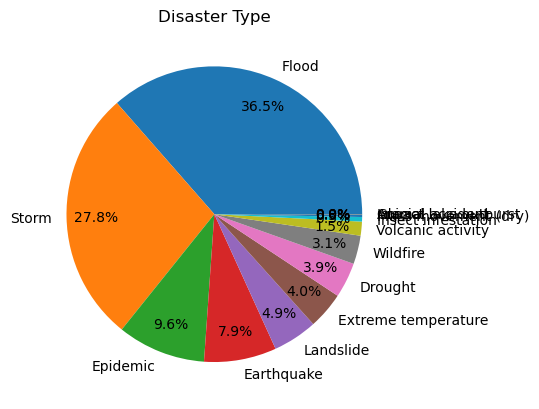

In [14]:
plt.axes(aspect='equal')    
plt.pie(
    x=disaster_c,
    labels=disaster_c.index,
    autopct='%.1f%%',
    pctdistance=0.8,     
    labeldistance=1.1,    
    textprops = {'fontsize':10,"color":"black"}
)

plt.title("Disaster Type")
plt.show()

value count of each country  
there are total 228 countries taken into account  
the bar plot only displays the countries with more data points.

In [15]:
iso_c = df2['ISO'].value_counts()
iso_c

USA    940
CHN    898
IND    652
PHL    609
IDN    521
      ... 
QAT      1
BLM      1
MAF      1
SXM      1
IMN      1
Name: ISO, Length: 228, dtype: int64

<AxesSubplot:ylabel='ISO'>

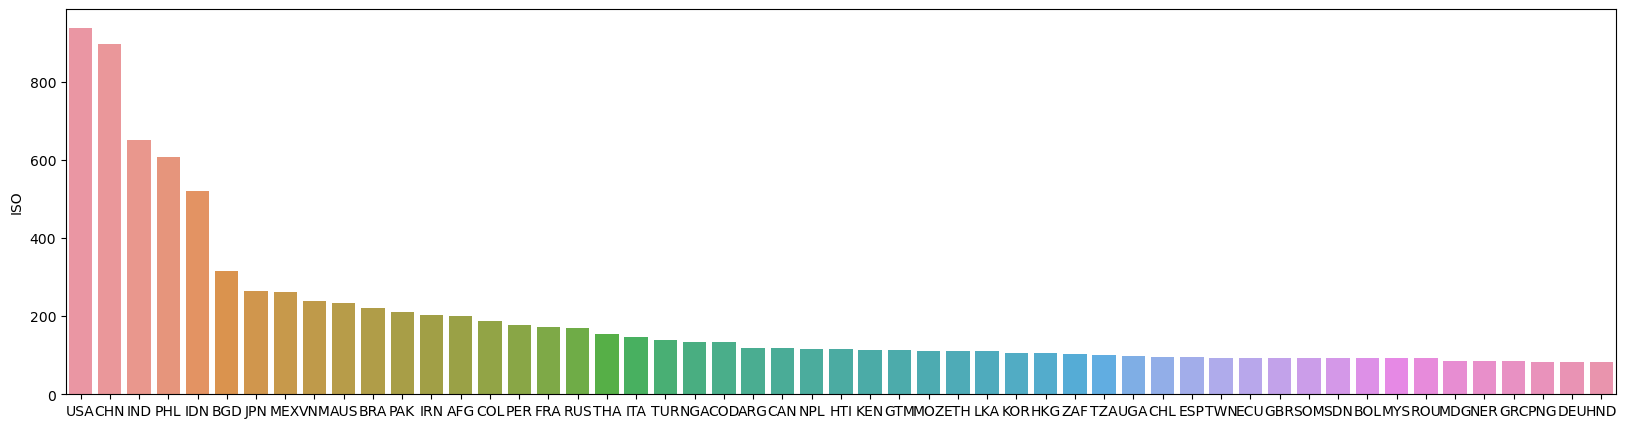

In [16]:
iso = iso_c[iso_c > 80]
plt.figure(figsize = (20, 5))
sns.barplot(y=iso, x=iso.index)

value count of each region  
there are total 23 regions taken into account  
the bar chart takes everything while the pie chart takes only regions that has over 100 data points

In [17]:
region_c = df2['Region'].value_counts()
region_c

Southern Asia                1828
South-Eastern Asia           1789
Eastern Asia                 1559
South America                1146
Eastern Africa               1085
Northern America             1064
Central America               739
Western Africa                709
Southern Europe               571
Eastern Europe                531
Caribbean                     520
Western Europe                491
Middle Africa                 410
Western Asia                  410
Australia and New Zealand     307
Northern Africa               293
Melanesia                     225
Northern Europe               207
Southern Africa               190
Central Asia                  139
Polynesia                      75
Russian Federation             46
Micronesia                     41
Name: Region, dtype: int64

<AxesSubplot:ylabel='Region'>

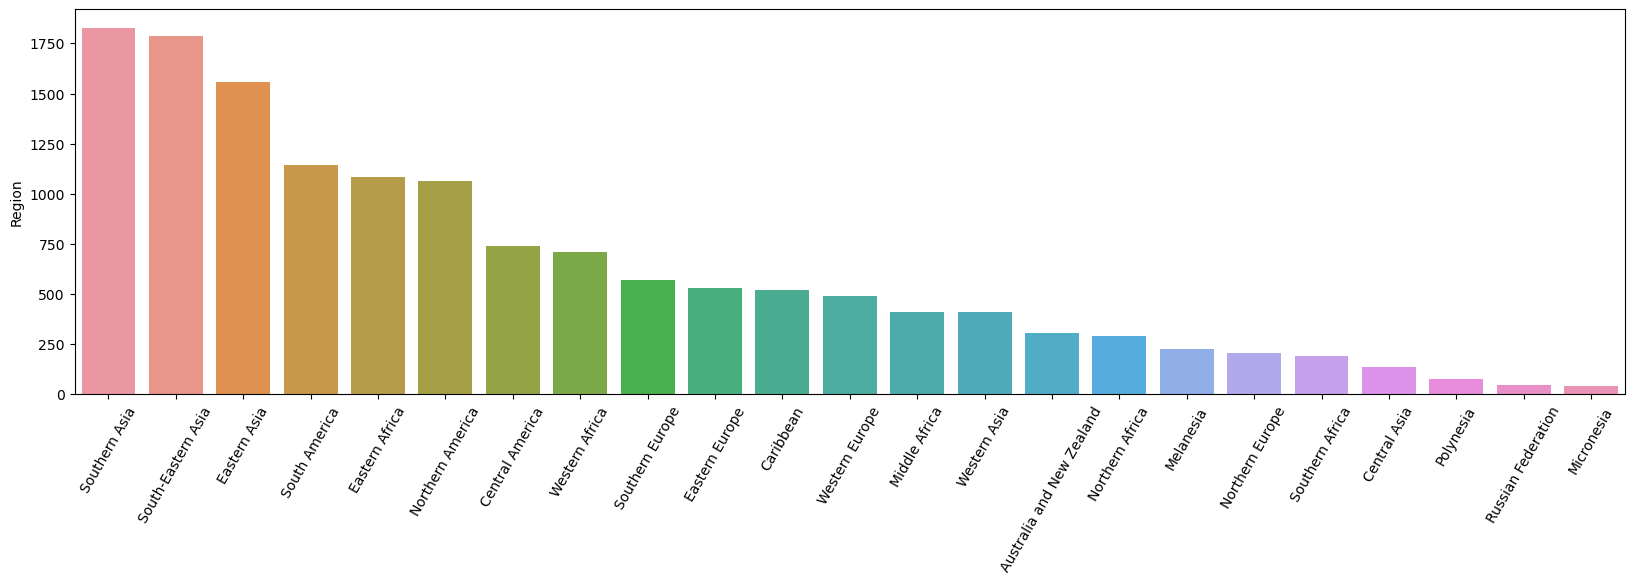

In [18]:
plt.figure(figsize = (20, 5))
plt.xticks(rotation = 60)
sns.barplot(y=region_c, x=region_c.index)

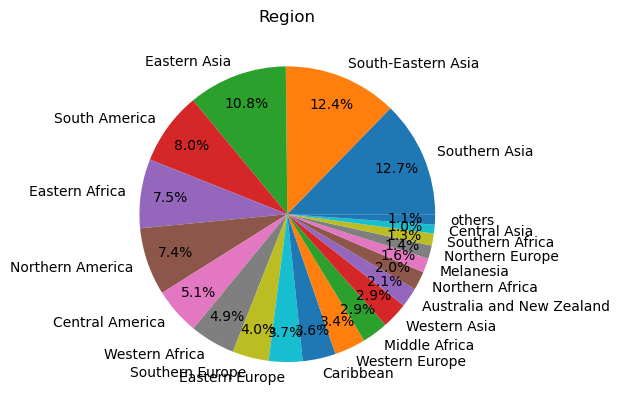

In [19]:
o = sum(region_c[region_c < 100])
region = region_c[region_c > 100]
region["others"] = o

plt.axes(aspect='equal')    
plt.pie(
    x=region,
    labels=region.index,
    autopct='%.1f%%',
    pctdistance=0.8,     
    labeldistance=1.1,    
    textprops = {'fontsize':10,"color":"black"}
)

plt.title("Region")
plt.show()

value count of each continent

In [20]:
continent_c = df2['Continent'].value_counts()
continent_c

Asia        5725
Americas    3469
Africa      2687
Europe      1846
Oceania      648
Name: Continent, dtype: int64

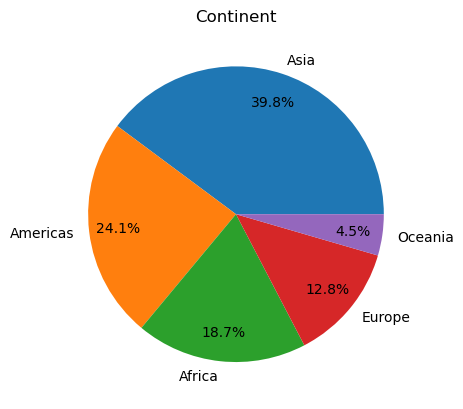

In [21]:
plt.axes(aspect='equal')    
plt.pie(
    x=continent_c,
    labels=continent_c.index,
    autopct='%.1f%%',
    pctdistance=0.8,     
    labeldistance=1.1,    
    textprops = {'fontsize':10,"color":"black"}
)

plt.title("Continent")
plt.show()

Histogram of "Dis Mag Value" with different "Dis Mag Scale"  
only 'Dis Mag Value - Km2' contains multiple types of disaster.

In [22]:
set(df2["Dis Mag Scale"])

{'Km2', 'Kph', 'Richter', 'Vaccinated', nan, '°C'}

Text(0.5, 1.0, 'Dis Mag Value - Km2')

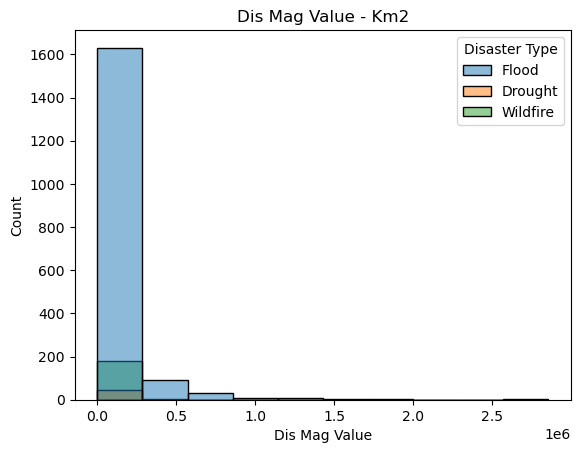

In [23]:
dd = df2.loc[df2["Dis Mag Scale"] == "Km2"]
pic = sns.histplot(dd, x="Dis Mag Value", bins = 10, hue = "Disaster Type")
pic.set_title('Dis Mag Value - Km2')

Text(0.5, 1.0, 'Dis Mag Value - Kph')

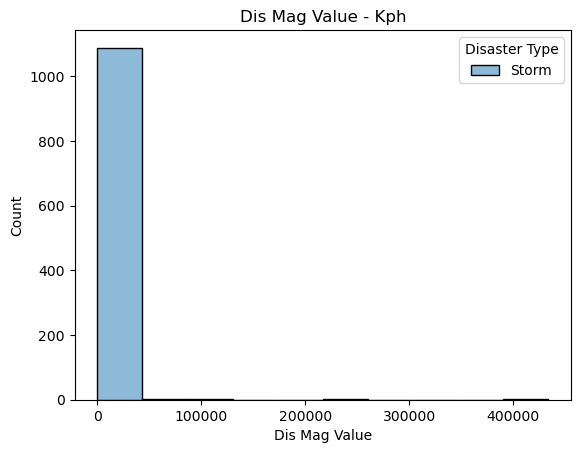

In [24]:
dd = df2.loc[df2["Dis Mag Scale"] == "Kph"]
pic = sns.histplot(dd, x="Dis Mag Value", bins = 10, hue = "Disaster Type")
pic.set_title('Dis Mag Value - Kph')

Text(0.5, 1.0, 'Dis Mag Value - Richter')

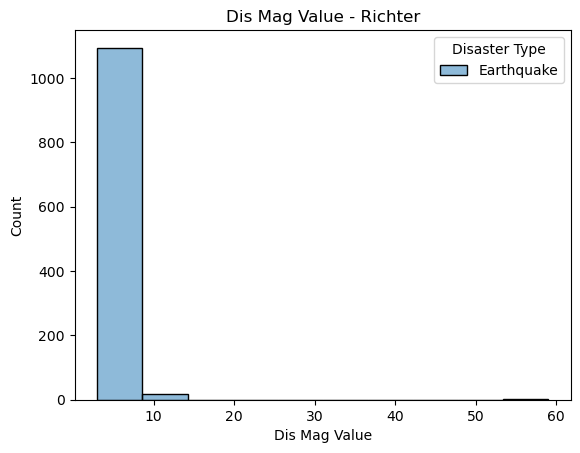

In [25]:
dd = df2.loc[df2["Dis Mag Scale"] == "Richter"]
pic = sns.histplot(dd, x="Dis Mag Value", bins = 10, hue = "Disaster Type")
pic.set_title('Dis Mag Value - Richter')

There is one data point greater than 10, which is apparently wrong.  
After a google, the "Dis Mag Value" should be 6.3.  
source: https://en.wikipedia.org/wiki/2021_Larissa_earthquake

In [26]:
dd.loc[(dd['Dis Mag Value'] > 10)]

,Disaster Type,Country,ISO,Region,Continent,Location,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Total Deaths,Total Affected,Total Damages ('000 US$),CPI,Date
14394,Earthquake,Greece,GRC,Southern Europe,Europe,"Larissa, Elassona (Larisis) , Tyrnavos (Larisi...",59.00,Richter,39.789,22.119,NaN,2711.00,10000.00,NaN,2021/3/3


In [27]:
a = dd.loc[(df1['Dis Mag Value'] > 10)].index.tolist()
a = a[0]
dd.loc[a, ['Dis Mag Value']] = 6.3

C:\Users\Zheyi\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Text(0.5, 1.0, 'Dis Mag Value - Richter')

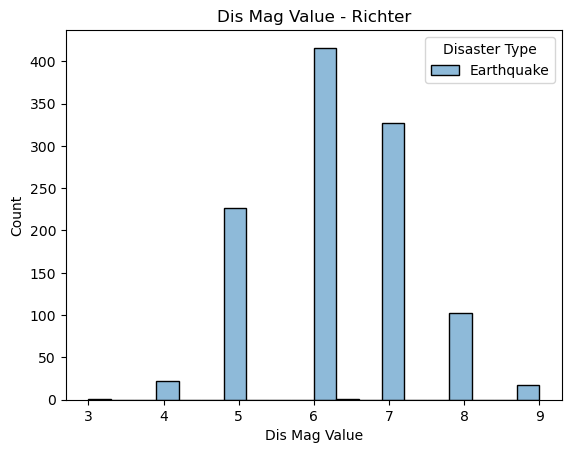

In [28]:
pic = sns.histplot(dd, x="Dis Mag Value", bins = 20, hue = "Disaster Type")
pic.set_title('Dis Mag Value - Richter')

Text(0.5, 1.0, 'Dis Mag Value - Vaccinated')

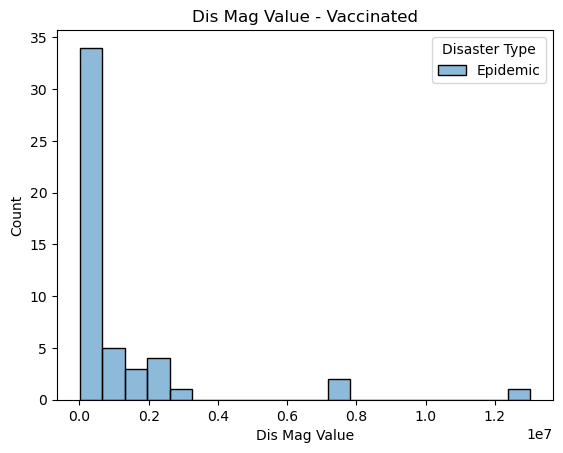

In [29]:
dd = df2.loc[df2["Dis Mag Scale"] == "Vaccinated"]
pic = sns.histplot(dd, x="Dis Mag Value", bins = 20, hue = "Disaster Type")
pic.set_title('Dis Mag Value - Vaccinated')

Text(0.5, 1.0, 'Dis Mag Value - °C')

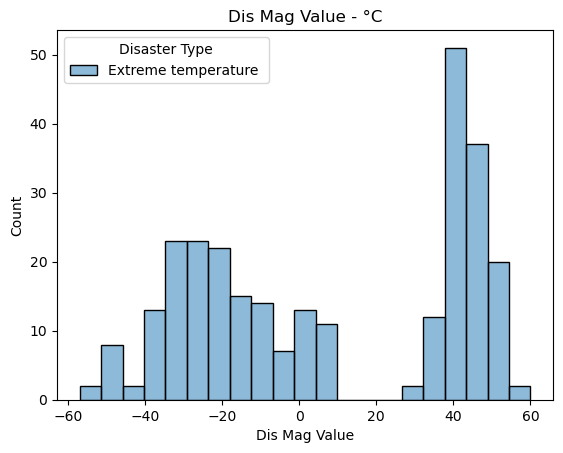

In [30]:
dd = df2.loc[df2["Dis Mag Scale"] == "°C"]
pic = sns.histplot(dd, x="Dis Mag Value", bins = 21, hue = "Disaster Type")
pic.set_title('Dis Mag Value - °C')

In [31]:
Stop

NameError: name 'Stop' is not defined

In [32]:
df.head()

,Disaster Type,Country,ISO,Region,Continent,Location,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,Total Deaths,Total Affected,Total Damages ('000 US$),CPI
0,Flood,Argentina,ARG,South America,Americas,Mendoza,NaN,Km2,NaN,NaN,1970,1.00,4.00,36.00,NaN,25000.00,15.00
1,Storm,Australia,AUS,Australia and New Zealand,Oceania,Queensland,NaN,Kph,NaN,NaN,1970,1.00,NaN,13.00,NaN,72475.00,15.00
2,Flood,Benin,BEN,Western Africa,Africa,Atacora region,NaN,Km2,NaN,NaN,1970,9.00,NaN,NaN,NaN,200.00,15.00
3,Storm,Bangladesh,BGD,Southern Asia,Asia,"Khulna, Chittagong",NaN,Kph,NaN,NaN,1970,11.00,12.00,300000.00,3648000.00,86400.00,15.00
4,Storm,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,Kph,NaN,NaN,1970,4.00,13.00,17.00,110.00,NaN,15.00


In [33]:
df1 = df.dropna(subset = ['Total Affected'])

dis = df1['Disaster Type'].unique().tolist()
dis

['Storm',
 'Flood',
 'Drought',
 'Landslide',
 'Earthquake',
 'Epidemic',
 'Mass movement (dry)',
 'Wildfire',
 'Extreme temperature ',
 'Volcanic activity',
 'Insect infestation',
 'Impact',
 'Animal accident',
 'Glacial lake outburst']

In [34]:
dic = {}
for d in dis:
    s = sum(df1[df1['Disaster Type'] == d]['Total Affected'])
    dic[d] = s
    
a = sorted(dic.items(), key=lambda x: x[1], reverse=True)
a

[('Flood', 3818297076.0),
 ('Drought', 2655002730.0),
 ('Storm', 1192002045.0),
 ('Earthquake', 195900647.0),
 ('Extreme temperature ', 103635513.0),
 ('Epidemic', 29038759.0),
 ('Wildfire', 17938908.0),
 ('Landslide', 10648275.0),
 ('Volcanic activity', 9374131.0),
 ('Insect infestation', 2802200.0),
 ('Impact', 301491.0),
 ('Mass movement (dry)', 25487.0),
 ('Glacial lake outburst', 24.0),
 ('Animal accident', 5.0)]

In [35]:
df3 = df.dropna(subset = ["Total Damages ('000 US$)"])
dis = df3['Disaster Type'].unique().tolist()

dic3 = {}
for d in dis:
    s = sum(df3[df3['Disaster Type'] == d]["Total Damages ('000 US$)"])
    dic[d] = s
    
c = sorted(dic.items(), key=lambda x: x[1], reverse=True)
c

[('Storm', 1640243066.0),
 ('Flood', 906763343.0),
 ('Earthquake', 837086345.0),
 ('Drought', 183898556.0),
 ('Wildfire', 120022775.0),
 ('Extreme temperature ', 62646343.0),
 ('Epidemic', 29038759.0),
 ('Landslide', 11088907.0),
 ('Volcanic activity', 5069712.0),
 ('Insect infestation', 230125.0),
 ('Glacial lake outburst', 210000.0),
 ('Impact', 33000.0),
 ('Mass movement (dry)', 9000.0),
 ('Animal accident', 5.0)]

In [36]:
df2 = df.dropna(subset = ['Total Deaths'])
dis = df2['Disaster Type'].unique().tolist()

dic2 = {}
for d in dis:
    s = sum(df2[df2['Disaster Type'] == d]['Total Deaths'])
    dic[d] = s
    
b = sorted(dic.items(), key=lambda x: x[1], reverse=True)
b

[('Earthquake', 1319284.0),
 ('Storm', 817134.0),
 ('Drought', 700774.0),
 ('Flood', 330683.0),
 ('Epidemic', 259615.0),
 ('Insect infestation', 230125.0),
 ('Extreme temperature ', 189101.0),
 ('Landslide', 40737.0),
 ('Impact', 33000.0),
 ('Volcanic activity', 27135.0),
 ('Wildfire', 2963.0),
 ('Mass movement (dry)', 2324.0),
 ('Glacial lake outburst', 250.0),
 ('Animal accident', 12.0)]

In [37]:
# df.to_csv("disaster_data.csv")

In [38]:
df.head()

,Disaster Type,Country,ISO,Region,Continent,Location,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,Total Deaths,Total Affected,Total Damages ('000 US$),CPI
0,Flood,Argentina,ARG,South America,Americas,Mendoza,NaN,Km2,NaN,NaN,1970,1.00,4.00,36.00,NaN,25000.00,15.00
1,Storm,Australia,AUS,Australia and New Zealand,Oceania,Queensland,NaN,Kph,NaN,NaN,1970,1.00,NaN,13.00,NaN,72475.00,15.00
2,Flood,Benin,BEN,Western Africa,Africa,Atacora region,NaN,Km2,NaN,NaN,1970,9.00,NaN,NaN,NaN,200.00,15.00
3,Storm,Bangladesh,BGD,Southern Asia,Asia,"Khulna, Chittagong",NaN,Kph,NaN,NaN,1970,11.00,12.00,300000.00,3648000.00,86400.00,15.00
4,Storm,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,Kph,NaN,NaN,1970,4.00,13.00,17.00,110.00,NaN,15.00


## Earthquake

In [39]:
df4 = df[df['Disaster Type'] == 'Earthquake'][['Country', 'Total Deaths']]
df4 = df4.dropna(subset = ['Total Deaths'])

con = df4['Country'].unique().tolist()

dic4 = {}
for c in con:
    s = sum(df4[df4['Country'] == c]['Total Deaths'])
    dic4[c] = s
    
dic4_s = sorted(dic4.items(), key=lambda x: x[1], reverse=True)
dic4_s

[('China', 368125.0),
 ('Haiti', 225164.0),
 ('Indonesia', 186403.0),
 ('Iran (Islamic Republic of)', 106822.0),
 ('Pakistan', 79893.0),
 ('Peru', 68061.0),
 ('India', 49813.0),
 ('Sri Lanka', 35399.0),
 ('Turkey', 29642.0),
 ('Japan', 25899.0),
 ('Soviet Union', 25585.0),
 ('Guatemala', 23076.0),
 ('Mexico', 10790.0),
 ('Nicaragua', 10188.0),
 ('Nepal', 9785.0),
 ('Afghanistan', 9453.0),
 ('Philippines (the)', 9021.0),
 ('Thailand', 8347.0),
 ('Italy', 6399.0),
 ('Ecuador', 5772.0),
 ('Algeria', 5164.0),
 ('Taiwan (Province of China)', 2490.0),
 ('Colombia', 2451.0),
 ('Papua New Guinea', 2450.0),
 ('El Salvador', 2281.0),
 ('Russian Federation (the)', 2019.0),
 ('Romania', 1650.0),
 ('Yemen Arab Rep', 1507.0),
 ('Chile', 898.0),
 ('Morocco', 628.0),
 ('Egypt', 562.0),
 ('Solomon Islands', 315.0),
 ('Greece', 302.0),
 ('Somalia', 298.0),
 ('Guinea', 275.0),
 ('United States of America (the)', 211.0),
 ('Myanmar', 187.0),
 ('New Zealand', 185.0),
 ('Samoa', 148.0),
 ('Yugoslavia', 133.

In [40]:
df4 = df[df['Disaster Type'] == 'Earthquake'][['Country', 'Total Affected']]
df4 = df4.dropna(subset = ['Total Affected'])

con = df4['Country'].unique().tolist()

dic4 = {}
for c in con:
    s = sum(df4[df4['Country'] == c]['Total Affected'])
    dic4[c] = s
    
dic4_s = sorted(dic4.items(), key=lambda x: x[1], reverse=True)
dic4_s

[('China', 77388106.0),
 ('India', 28516322.0),
 ('Indonesia', 12198316.0),
 ('Chile', 7837134.0),
 ('Pakistan', 7411586.0),
 ('Philippines (the)', 6572590.0),
 ('Turkey', 6515480.0),
 ('Guatemala', 6450010.0),
 ('Nepal', 6352000.0),
 ('Peru', 6164388.0),
 ('Haiti', 4331099.0),
 ('Mexico', 4138061.0),
 ('Iran (Islamic Republic of)', 2724035.0),
 ('El Salvador', 2412930.0),
 ('Soviet Union', 2207297.0),
 ('Japan', 1615004.0),
 ('Colombia', 1380119.0),
 ('Algeria', 1202639.0),
 ('Sri Lanka', 1019306.0),
 ('Greece', 960891.0),
 ('Italy', 871134.0),
 ('Nicaragua', 746175.0),
 ('Azerbaijan', 734971.0),
 ('Afghanistan', 720763.0),
 ('Ecuador', 688096.0),
 ('New Zealand', 622762.0),
 ('Papua New Guinea', 594909.0),
 ('Yemen Arab Rep', 401500.0),
 ('Romania', 392850.0),
 ('Yugoslavia', 316840.0),
 ('Croatia', 230349.0),
 ('Albania', 216120.0),
 ('Kyrgyzstan', 176063.0),
 ('Costa Rica', 164493.0),
 ('Tanzania, United Republic of', 148092.0),
 ('Taiwan (Province of China)', 112028.0),
 ('Somalia

In [41]:
df4 = df[df['Disaster Type'] == 'Earthquake'][['Country', "Total Damages ('000 US$)"]]
df4 = df4.dropna(subset = ["Total Damages ('000 US$)"])

con = df4['Country'].unique().tolist()

dic4 = {}
for c in con:
    s = sum(df4[df4['Country'] == c]["Total Damages ('000 US$)"])
    dic4[c] = s
    
dic4_s = sorted(dic4.items(), key=lambda x: x[1], reverse=True)
dic4_s

[('Japan', 389545400.0),
 ('China', 112516357.0),
 ('Italy', 54577352.0),
 ('United States of America (the)', 40094020.0),
 ('Chile', 32893060.0),
 ('New Zealand', 28660000.0),
 ('Turkey', 25175400.0),
 ('Soviet Union', 16544800.0),
 ('Taiwan (Province of China)', 15927900.0),
 ('Mexico', 14513000.0),
 ('Indonesia', 14239056.0),
 ('Iran (Islamic Republic of)', 12635628.0),
 ('Algeria', 10262929.0),
 ('Haiti', 8000000.0),
 ('Greece', 7610700.0),
 ('Croatia', 7269444.0),
 ('Nepal', 5479000.0),
 ('Pakistan', 5351755.0),
 ('India', 5296300.0),
 ('Ecuador', 3535000.0),
 ('El Salvador', 3353500.0),
 ('Colombia', 2318066.0),
 ('Romania', 2000000.0),
 ('Yemen Arab Rep', 2000000.0),
 ('Peru', 1492650.0),
 ('Sri Lanka', 1316500.0),
 ('Guatemala', 1212050.0),
 ('Egypt', 1200000.0),
 ('Thailand', 1062000.0),
 ('Australia', 1000000.0),
 ('Puerto Rico', 950000.0),
 ('Nicaragua', 873000.0),
 ('Albania', 750000.0),
 ('Philippines (the)', 656274.0),
 ('Russian Federation (the)', 551520.0),
 ('Myanmar',

storm

In [ ]:
df5 = df[df['Disaster Type'] == 'Storm'][['Country', 'Total Deaths']]
df5 = df5.dropna(subset = ['Total Deaths'])

con = df5['Country'].unique().tolist()

dic5 = {}
for c in con:
    s = sum(df5[df5['Country'] == c]['Total Deaths'])
    dic5[c] = s
    
dic5_s = sorted(dic5.items(), key=lambda x: x[1], reverse=True)
dic5_s

In [ ]:
df5 = df[df['Disaster Type'] == 'Storm'][['Country', 'Total Affected']]
df5 = df5.dropna(subset = ['Total Affected'])

con = df5['Country'].unique().tolist()

dic5 = {}
for c in con:
    s = sum(df5[df5['Country'] == c]['Total Affected'])
    dic5[c] = s
    
dic5_s = sorted(dic5.items(), key=lambda x: x[1], reverse=True)
dic5_s

In [ ]:
df5 = df[df['Disaster Type'] == 'Storm'][['Country', "Total Damages ('000 US$)"]]
df5 = df5.dropna(subset = ["Total Damages ('000 US$)"])

con = df5['Country'].unique().tolist()

dic5 = {}
for c in con:
    s = sum(df5[df5['Country'] == c]["Total Damages ('000 US$)"])
    dic5[c] = s
    
dic5_s = sorted(dic5.items(), key=lambda x: x[1], reverse=True)
dic5_s

flood

In [ ]:
df6 = df[df['Disaster Type'] == 'Flood'][['Country', "Total Damages ('000 US$)"]]
df6 = df6.dropna(subset = ["Total Damages ('000 US$)"])

con = df6['Country'].unique().tolist()

dic6 = {}
for c in con:
    s = sum(df6[df6['Country'] == c]["Total Damages ('000 US$)"])
    dic6[c] = s
    
dic6_s = sorted(dic6.items(), key=lambda x: x[1], reverse=True)
dic6_s

In [ ]:
df6 = df[df['Disaster Type'] == 'Flood'][['Country', 'Total Affected']]
df6 = df6.dropna(subset = ['Total Affected'])

con = df6['Country'].unique().tolist()

dic6 = {}
for c in con:
    s = sum(df6[df6['Country'] == c]['Total Affected'])
    dic6[c] = s
    
dic6_s = sorted(dic6.items(), key=lambda x: x[1], reverse=True)
dic6_s

In [ ]:
df6 = df[df['Disaster Type'] == 'Flood'][['Country', 'Total Deaths']]
df6 = df6.dropna(subset = ['Total Deaths'])

con = df6['Country'].unique().tolist()

dic6 = {}
for c in con:
    s = sum(df6[df6['Country'] == c]['Total Deaths'])
    dic6[c] = s
    
dic6_s = sorted(dic6.items(), key=lambda x: x[1], reverse=True)
dic6_s

In [ ]:
df2.head()